In [1]:
"""SmallWorldNetwork contains the parts of a solution to the 
small-world network problem in Sethna's book that relate specifically
to the Watts-Strogatz small world networks. The more general graph
algorithms for path lengths and betweenness are in Networks.py."""

# Import the necessary libraries.
import random, os
import scipy, pylab
import NetGraphics
import Networks 
import importlib
importlib.reload(Networks)	# Helps with ipython %run command

def MakeRingGraph(num_nodes, Z):
    """
    Makes a ring graph with Z neighboring edges per node.
    """

    #make network class
    g=Networks.UndirectedGraph()

    dis=int(Z/2)

    
    #Add all nodes
    for i in range(1,num_nodes+1):
        for j in range(1,dis+1):
            if i+j <=num_nodes:
                g.AddEdge(i,i+j)
    
    for i in range(1+dis,num_nodes-dis+1):
        for j in range(1,dis+1):
            g.AddEdge(i,i+j)
            g.AddEdge(i,i-j)

    for i in range(num_nodes-dis+1,num_nodes+1):
        for j in range(i+1,num_nodes+1):
            g.AddEdge(i,j)
        for j in range(1,dis-(num_nodes-i+1)+2):
            g.AddEdge(i,j)

    for i in range(1,dis+1):
        for j in range(i+1,dis+1):
            g.AddEdge(i,j)

    return g

def AddRandomEdges(graph, num_edges_tried,L):
    """Attempts to add num_edges_tried random bonds to a graph. It may add 
    fewer, if the bonds already exist."""
    Num_rand=0
    while Num_rand<num_edges_tried:
        node1=random.randint(1,L)
        node2=random.randint(1,L)
        if node1 != node2:
            graph.AddEdge(node1,node2)
            Num_rand+=1
    return graph

def MakeSmallWorldNetwork(L, Z, p):
    """
    Makes a small--world network of size L and Z neighbors,
    with p*Z*L/2 shortcuts added.  This is the Watts-Newman variant
    of the original Watts-Strogatz model.  The original model
    used a rewiring technique, replacing a randomly selected short-range
    bond with a randomly-selected long-range shortcut.  The Watts-Newman
    model keeps all short-range bonds intact, and adds p*Z*L/2 random
    shortcuts.  This revised model is both simpler to treat analytically
    (see the renormalization group analysis by Watts and Newman) and
    avoids the potential for subgraphs to become disconnected from
    one another due to rewiring.
    """

    g = MakeRingGraph(L,Z)
    
    numShortcuts=p*L*Z/2
    
    g=AddRandomEdges(g, numShortcuts,L)

    return(g)

def SmallWorldSimple(L, Z, p):
    """
    Generate and display small world network. Creates a graph g using
    MakeSmallWorldNetwork, and uses the NetGraphics command 
    DisplayCircleGraph, with only the mandatory argument g. Returns g.
    """

    g = MakeSmallWorldNetwork(L,Z,p)
    #NetGraphics.DisplayCircleGraph(g,L,Z,p)

    return g

L=50    #Number of nodes
Z=2     #Number of edges each node has
p=0     #Probabilaty coeff




In [2]:
p = []
avg = []
for i in range(0,10000+1):
    p.append(i/10000)
    g=SmallWorldSimple(L,Z,p[i])
    avg.append(Networks.FindAveragePathLength(g))

Avg=[]
for i in range(0,10001):
    Avg.append(avg[i]/avg[0])

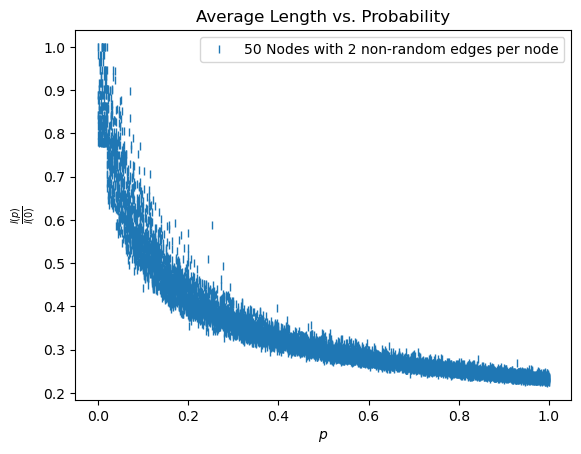

In [3]:
from matplotlib import pyplot as py
import numpy as np
title="Average Length vs. Probability"
py.plot(p,Avg, '|', label=str(L)+" Nodes with "+str(Z)+" non-random edges per node")
py.xlabel(r'$p$')
py.ylabel(r'$\frac{l(p)}{l(0)}$')
py.title(title)
py.legend()
py.savefig(title + '.png', dpi=500)
py.show()


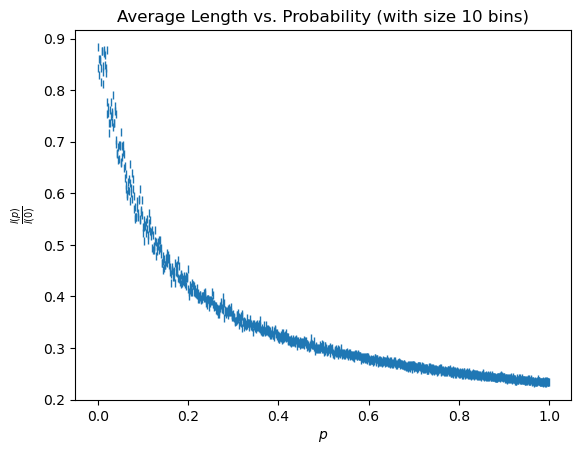

In [4]:
PBins1000 = []
AvgBins1000 = []
for i in range(0,1000):
    j=i*10
    ThisAvgBin = []
    ThisPBin = []
    while j<(i+1)*10:
        ThisPBin.append(p[j])
        ThisAvgBin.append(Avg[j])
        j+=1
    PBins1000.append(sum(ThisPBin)/10)
    AvgBins1000.append(sum(ThisAvgBin)/10)
    
title="Average Length vs. Probability (with size 10 bins)"
py.plot(PBins1000,AvgBins1000, '|',label=str(L)+" Nodes with "+str(Z)+" non-random edges per node")
py.xlabel(r'$p$')
py.ylabel(r'$\frac{l(p)}{l(0)}$')
py.title(title)
py.savefig(title + '.png', dpi=500)
py.show()


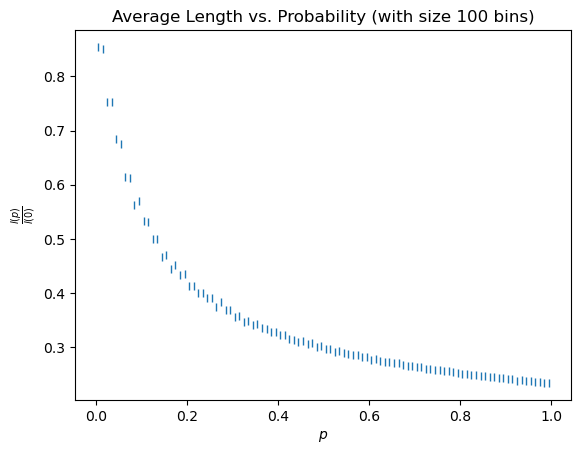

In [5]:
PBins100 = []
AvgBins100 = []
for i in range(0,100):
    j=i*100
    ThisAvgBin = []
    ThisPBin = []
    while j<(i+1)*100:
        ThisPBin.append(p[j])
        ThisAvgBin.append(Avg[j])
        j+=1
    PBins100.append(sum(ThisPBin)/100)
    AvgBins100.append(sum(ThisAvgBin)/100)
    
title="Average Length vs. Probability (with size 100 bins)"
py.plot(PBins100,AvgBins100, '|', label=str(L)+" Nodes with "+str(Z)+" non-random edges per node")
py.xlabel(r'$p$')
py.ylabel(r'$\frac{l(p)}{l(0)}$')
py.title(title)
py.savefig(title + '.png', dpi=500)
py.show()